<a href="https://colab.research.google.com/github/KhotNoorin/Deep-Learning/blob/main/Gated_Recurrent_Unit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gated Recurrent Unit (GRU):

The **Gated Recurrent Unit (GRU)** is a type of Recurrent Neural Network (RNN) architecture introduced in 2014 as a simpler alternative to the **Long Short-Term Memory (LSTM)** unit. Like LSTMs, GRUs are designed to handle the vanishing gradient problem and to capture long-range dependencies in sequential data. However, GRUs have a simpler structure and fewer parameters compared to LSTMs, making them computationally efficient.


---


<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/0*M0_8HpPdoE-6QQ72.png" width="1000"/>

---

## Why GRUs?

Standard RNNs suffer from the **vanishing gradient** problem during backpropagation through time (BPTT), which makes it difficult for the network to learn long-term dependencies. GRUs address this issue using **gating mechanisms** to control the flow of information.

---

## GRU Architecture

GRU combines the **hidden state** and **cell state** into a single state vector, unlike LSTM which keeps them separate. It uses two gates:

- **Update Gate (z_t):** Determines how much of the previous memory to keep.
- **Reset Gate (r_t):** Decides how to combine the new input with the previous memory.

### GRU Equations

Let:
- \( x_t \) be the input at time step \( t \)
- \( h_{t-1} \) be the previous hidden state
- \( h_t \) be the current hidden state
- \( W, U, b \) are learnable parameters

The GRU updates are defined as:

1. **Update gate:**
\[
z_t = \sigma(W_z x_t + U_z h_{t-1} + b_z)
\]

2. **Reset gate:**
\[
r_t = \sigma(W_r x_t + U_r h_{t-1} + b_r)
\]

3. **Candidate activation:**
\[
\tilde{h}_t = \tanh(W_h x_t + U_h (r_t \odot h_{t-1}) + b_h)
\]

4. **Final hidden state:**
\[
h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t
\]

Where:
- \( \sigma \) is the sigmoid function
- \( \odot \) denotes element-wise multiplication

---

## Intuition

- The **update gate** helps the model determine how much past information to carry forward.
- The **reset gate** helps the model decide how much of the past information to forget.
- The **candidate activation** computes a new memory content.
- The final hidden state \( h_t \) is a **linear interpolation** between the previous hidden state and the candidate activation.

---

## Advantages of GRU

- **Simpler architecture** than LSTM (fewer gates and parameters).
- **Faster training** and inference.
- **Comparable performance** to LSTM on many tasks.
- **Efficient** for smaller datasets or real-time applications.

---

## Applications

- **Sentiment analysis**
- **Machine translation**
- **Speech recognition**
- **Time series forecasting**
- **Text generation**

---

## GRU vs LSTM

| Feature          | GRU                       | LSTM                      |
|------------------|---------------------------|---------------------------|
| Gates            | 2 (Update, Reset)         | 3 (Input, Forget, Output) |
| Memory state     | Single hidden state       | Hidden + Cell state       |
| Parameters       | Fewer                     | More                      |
| Training speed   | Faster                    | Slower                    |
| Performance      | Comparable (task-specific)| Comparable (task-specific)|

---




# GRU Model with IMDB Dataset

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [2]:
vocab_size = 10000  # Use top 10,000 most frequent words
maxlen = 200        # Max length of each review

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Preprocess: Pad sequences to equal length

In [4]:
X_train = pad_sequences(X_train, maxlen=maxlen, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=maxlen, padding='post', truncating='post')

#  Build the GRU model

In [8]:
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(maxlen,)))  # defines input shape
model.add(Embedding(input_dim=vocab_size, output_dim=128))
model.add(GRU(units=64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,317,313 (5.03 MB)

 Trainable params: 1,317,313 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

#  Compile the model

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#  Train the model

In [15]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8644 - loss: 0.3552 - val_accuracy: 0.8206 - val_loss: 0.4369
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9039 - loss: 0.2681 - val_accuracy: 0.8290 - val_loss: 0.4249
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9279 - loss: 0.2147 - val_accuracy: 0.8372 - val_loss: 0.4339
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9489 - loss: 0.1592 - val_accuracy: 0.8332 - val_loss: 0.4425
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9655 - loss: 0.1193 - val_accuracy: 0.8388 - val_loss: 0.4991
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9772 - loss: 0.0894 - val_accuracy: 0.8364 - val_loss: 0.5350
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9859 - loss: 0.0577 - val_accuracy: 0.8362 - val_loss: 0.6014
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9911 - loss: 0.0355 - val_accu

# Evaluate the model

In [16]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8118


#  Classification Report

In [17]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [18]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.85      0.82     12500
           1       0.84      0.78      0.80     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



# Confusion matrix

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


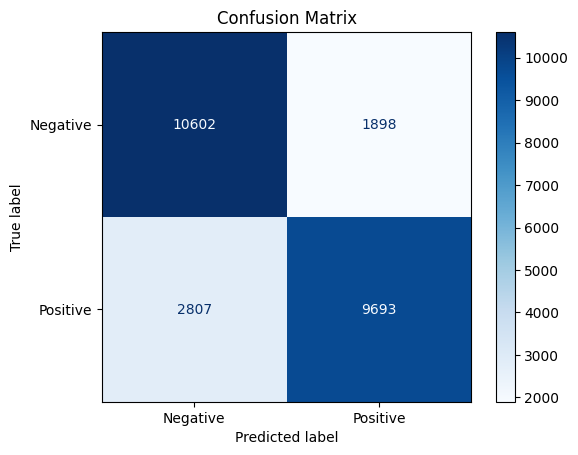

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

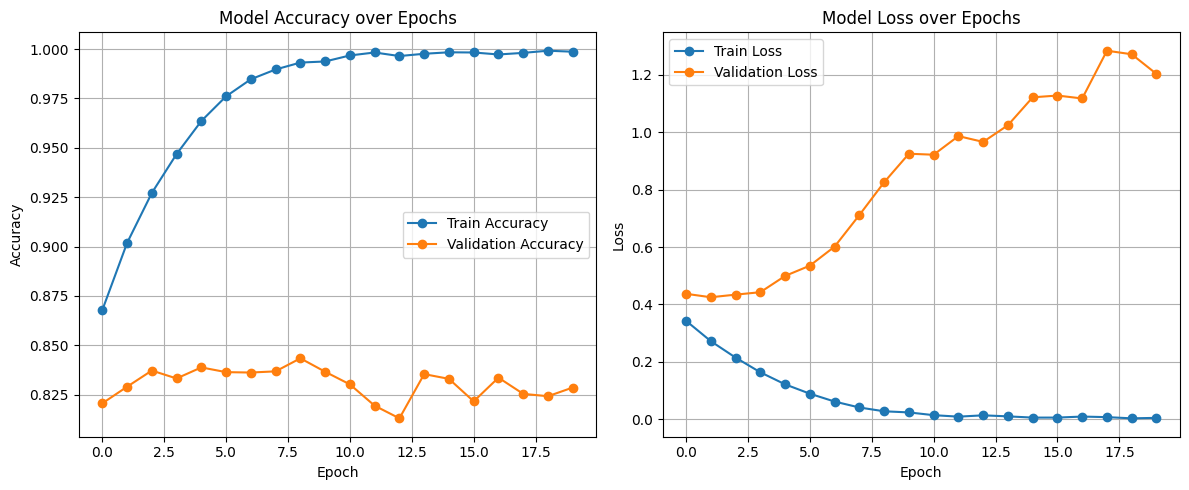

In [20]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()